In [119]:
%load_ext autoreload
%autoreload 2
from sys import path
from os import getcwd
path.append(getcwd() + "/..")

import numpy as np
from tqdm.notebook import tqdm
from simplegrad import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

from simplegrad.algo.nn import DenseLayer
from simplegrad.algo.optimize import Adam
import simplegrad.algo.optimize as sgo
from sklearn.metrics import accuracy_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import matplotlib
sns.set_style("dark")
sns.set(font_scale=1.6)

colors = ['crimson', 'teal', 'darkorange', 'navy', 'magenta']
sns.set_palette(colors + sns.color_palette('Set2'))
matplotlib.rcParams['figure.figsize'] = (12.0, 10.0)
%matplotlib inline

In [29]:
X, y = make_moons(n_samples=1001, noise=0.15)

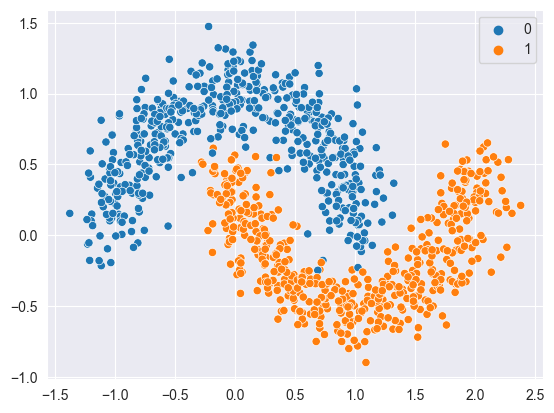

In [30]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.ravel(y))
None

In [31]:
denseLayerOne = DenseLayer(num_neurons=64, activation='elu')
denseLayerTwo = DenseLayer(num_neurons=32, activation='elu')
denseLayerThree = DenseLayer(num_neurons=1, activation='sigmoid')

In [32]:
def makeModel(input):
    model = denseLayerOne(input)
    model = denseLayerTwo(model)
    model = denseLayerThree(model)
    return model

In [33]:
X_var = Value(X)
model = makeModel(X_var)
model.shape

(1001, 1)

In [34]:
loss = ((model - y) ** 2).sum()

In [35]:
optimizer = Adam(
    model=loss,
    variables=denseLayerOne.getTrainable() +
              # denseLayerTwo.getTrainable() +
              denseLayerThree.getTrainable(),
    lr=0.001
)

In [36]:
history = []
for _ in tqdm(range(500)):
    optimizer.step()
    history.append(loss.value[0, 0])

  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
sns.lineplot(x=np.arange(len(history)), y=history)
None

In [ ]:
accuracy_score(np.rint(model.forward()), y)


In [ ]:
from simplegrad import Variable
from simplegrad.algo.optimize import Adam


def f(x):
    return x ** 4 - 20 * x ** 3 - 2 * x ** 2 - 8 * x + 3


x = Variable(5)
optimizer = Adam(model=f(x), variables=[x], lr=0.05)
hist = []
for iter in range(300):
    optimizer.step()
    hist.append((x.scalar, f(x.scalar)))

print(x.scalar)

In [ ]:
xs = np.linspace(5, 20, 1000)
sns.set_style('darkgrid')
sns.lineplot(x=xs, y=f(xs), c='navy', alpha=0.6)
hist = np.array(hist)
sns.scatterplot(x=hist[:, 0], y=hist[:, 1], s=20, alpha=0.6, color='darkorange')
sns.scatterplot(x=[x.scalar], y=[f(x.scalar)], color='crimson', s=100)
plt.xlim(xs.min(), xs.max())
plt.ylim(f(15) - 100, f(xs.min()))
None

In [147]:
x = Variable(10)
f = (1 + x) ** 2

optimizer = sgo.Newton(f, variables=[x])
for i in range(2):
    optimizer.step()
print(x.scalar) # -1.0

-1.0


In [115]:
g.grad

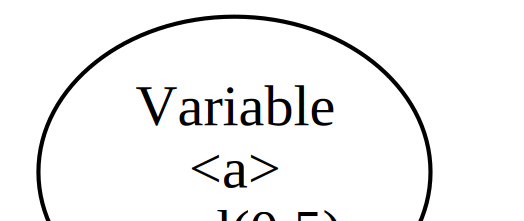

In [117]:
d.attr(kw='graph', rankdir="LR", dpi='300', bgcolor='transparent')
d.attr(kw='node', color='white', style='filled')
d

In [118]:
d.render(format='png')


'Digraph.gv.png'

In [74]:
def diff(f, x, delta=1e-5):
    return (f(x + delta) - f(x))/delta


In [80]:
def f(x):
    return np.power(x, 5)

def df(x):
    return 5 * np.power(x, 4)

In [83]:
deltas = [1e-5, 1e-6, 1e-7]

Text(0.5, 1.0, 'Numerical differentiation error for $f=x^5$')

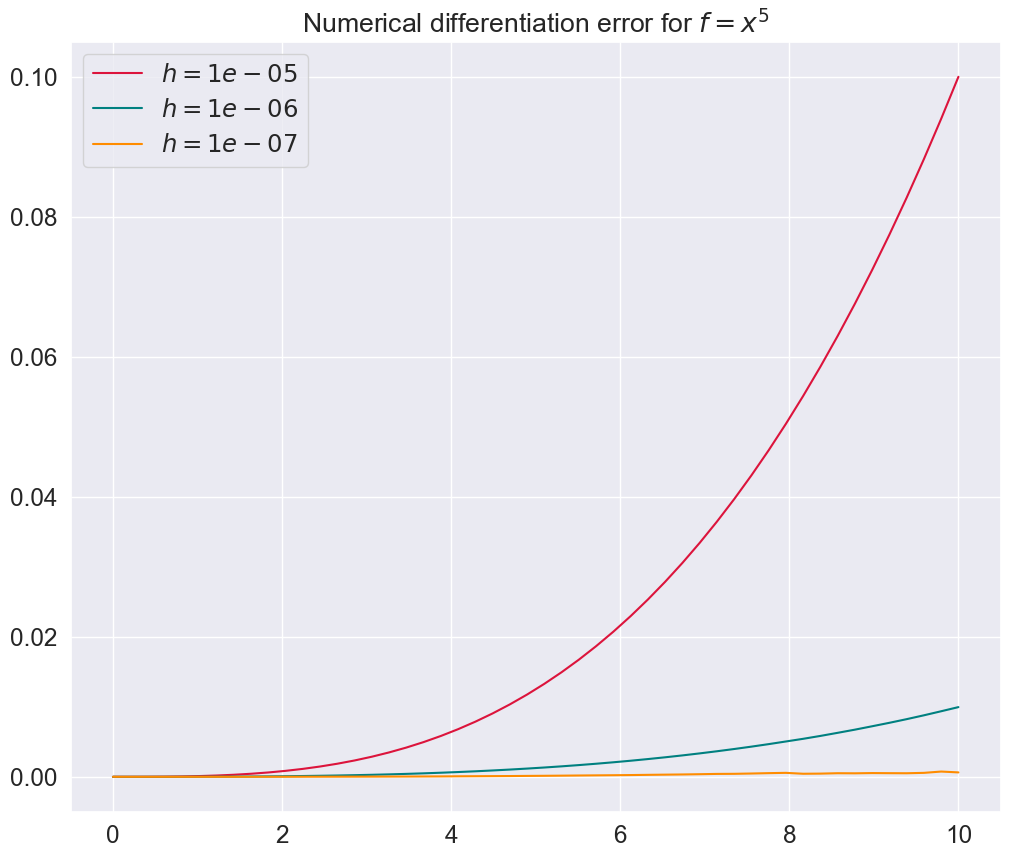

In [89]:
for delta in deltas:
    x = np.linspace(0, 10)
    num_diff = diff(f, x, delta=delta)
    act_diff = df(x)
    diff_diff = num_diff - act_diff
    sns.lineplot(x=x, y=diff_diff, label=f"$h={delta}$")

plt.title("Numerical differentiation error for $f=x^5$")